# **Análise de Rotatividade de Funcionários com Machine Learning**

Este projeto tem como objetivo analisar e prever a rotatividade voluntária de funcionários (attrition), com base em dados internos da empresa. A análise foi estruturada em três grandes etapas: Exploração dos dados, Modelagem preditiva e Avaliação dos resultados.

A base de dados contém variáveis demográficas, profissionais e salariais, como idade, tempo de empresa, promoções, estado civil, entre outras. O problema central é tratar a saída do funcionário como um evento a ser previsto (classificação binária), o que pode apoiar estratégias do RH na retenção de talentos e redução de custos operacionais.

Na seção de Exploração, realizamos a limpeza dos dados, tratamento de valores ausentes, transformação de variáveis e geração de novas features que pudessem capturar padrões mais sutis de comportamento.

Em seguida, na etapa de Modelos, treinamos diferentes algoritmos de machine learning, incluindo Regressão Logística, Random Forest e XGBoost, com atenção especial ao desbalanceamento das classes.

Por fim, na seção de Avaliação, comparamos os modelos com base em métricas como Recall, F1-score e AUC, priorizando a capacidade do modelo de identificar corretamente os funcionários que saíram da empresa.

#Bibliotecas e Importação

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

tabela = pd.read_csv("rh_data.csv")  # Ajuste conforme o nome do arquivo carregado

tabela.head(15)

Saving rh_data.csv to rh_data.csv


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


#Exploração

Nesta etapa, o foco esteve na preparação e compreensão do conjunto de dados.

Realizamos a limpeza inicial, com o tratamento de valores ausentes e ajuste de tipos de variáveis. Em seguida, aplicamos análises estatísticas descritivas e visualizações exploratórias para identificar padrões de comportamento entre diferentes grupos, como rotatividade por faixa etária, estado civil, tempo de empresa ou frequência de promoções.

Além disso, foram criadas novas variáveis derivadas (feature engineering), com o objetivo de aumentar o poder explicativo do modelo. Utilizamos principalmente dummy com One-Hot Encoding.

##Limpeza e Tratamento dos dados

###Identificando Nulos

In [ ]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Quando utilizei tabela.info() me retornou que duas colunas, as colunas NumCompaniesWorked e TotalWorkingYears, tinham valores divergentes de linhas. Enquanto toda a base possui 4410 eles possuem respectivamente 4391 e 4401.

In [ ]:
#Decidi colocar a mediana nesses valores faltantes
tabela['NumCompaniesWorked'].fillna(tabela['NumCompaniesWorked'].median(), inplace=True)
tabela['TotalWorkingYears'].fillna(tabela['TotalWorkingYears'].median(), inplace=True)
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

/tmp/ipython-input-4-3166105421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tabela['NumCompaniesWorked'].fillna(tabela['NumCompaniesWorked'].median(), inplace=True)
/tmp/ipython-input-4-3166105421.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

###Identificando Duplicados

In [ ]:

duplicados = tabela[tabela.duplicated(keep='first')]
print(duplicados)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeID, Gender, JobLevel, JobRole, MaritalStatus, MonthlyIncome, NumCompaniesWorked, Over18, PercentSalaryHike, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 24 columns]


###Verificando a Distribução dos Dados

In [ ]:
tabela.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.691837,15.209524,8.0,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.0,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


###Alterando tipo de dados

In [ ]:
# Corrigir tipos para categóricos
cat_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
            'Gender', 'JobRole', 'MaritalStatus', 'Over18']

for col in cat_cols:
    tabela[col] = tabela[col].astype('category')

# Corrigir colunas float64 que devem ser int
tabela['NumCompaniesWorked'] = tabela['NumCompaniesWorked'].astype('int')
tabela['TotalWorkingYears'] = tabela['TotalWorkingYears'].astype('int')


##Feature Engineering

###Dummy

In [ ]:
# Lista das variáveis categóricas nominais a transformar em dummies
vars_para_dummies = ['MaritalStatus', 'BusinessTravel', 'Department', 'EducationField']

# Aplicar get_dummies com drop_first para evitar multicolinearidade
tabela_dummies = pd.get_dummies(tabela, columns=vars_para_dummies, drop_first=True)


### Criando novas variaveis categoricas

In [ ]:
bins = [18, 29, 39, 49, 60]
labels = ['jovem', 'adulto jovem', 'adulto maduro', 'sênior']

tabela['faixa_etaria'] = pd.cut(tabela['Age'], bins=bins, labels=labels)

In [ ]:
tabela['TempoDesdePromocaoPorAno'] = tabela['YearsSinceLastPromotion'] / (tabela['YearsAtCompany'] + 1)
tabela[['TempoDesdePromocaoPorAno', 'YearsSinceLastPromotion', 'YearsAtCompany']].head()



,TempoDesdePromocaoPorAno,YearsSinceLastPromotion,YearsAtCompany
0,0.000000,0,1
1,0.166667,1,5
2,0.000000,0,5
3,0.777778,7,8
4,0.000000,0,6


##EDA

A Análise Exploratória de Dados (Exploratory Data Analysis – EDA) é uma etapa essencial no ciclo de ciência de dados, responsável por investigar a estrutura, padrões e relações presentes no conjunto de dados antes de qualquer modelagem.

O principal objetivo do EDA é entender as distribuições das variáveis, identificar valores extremos, detectar inconsistências, relações entre atributos e possíveis viéses nos dados. Além disso, essa fase ajuda a formular hipóteses e a orientar as decisões de engenharia de atributos e seleção de variáveis.

Durante essa análise, são aplicadas técnicas estatísticas e visualizações gráficas (como histogramas, gráficos de dispersão, mapas de calor e gráficos de barras segmentados) que facilitam a compreensão das variáveis, a comparação entre grupos e o comportamento da variável alvo (Attrition).

Ao final desta etapa, conseguimos identificar quais variáveis são mais relevantes para os próximos passos e quais transformações são necessárias para melhorar o desempenho dos modelos.

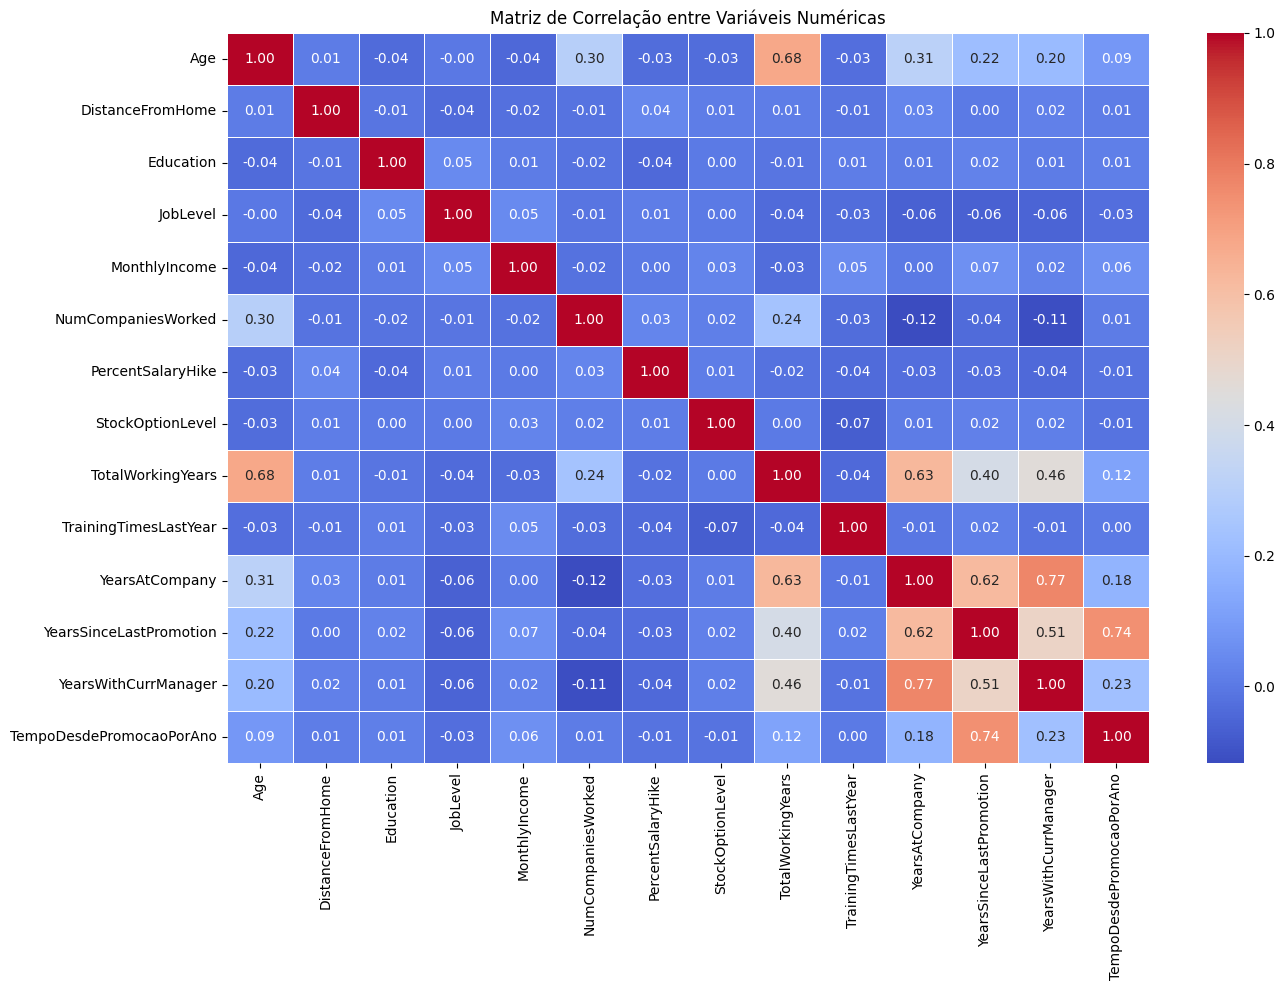

In [ ]:
# Remover variáveis irrelevantes ou redundantes
colunas_remover = [
    'Attrition', 'EmployeeID', 'EmployeeCount', 'StandardHours',
    'Over18', 'Gender', 'JobRole', 'faixa_etaria'
]

# Criar nova base só com variáveis numéricas relevantes
tabela_corr = tabela.drop(columns=colunas_remover, errors='ignore')

# Calcular matriz de correlação
matriz_correlacao = tabela_corr.corr(numeric_only=True)

# Plotar heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_correlacao, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

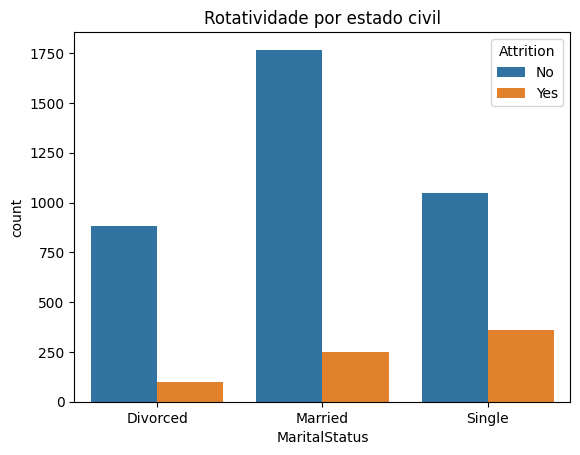

In [ ]:
sns.countplot(x='MaritalStatus', hue='Attrition', data=tabela)
plt.title('Rotatividade por estado civil')
plt.show()

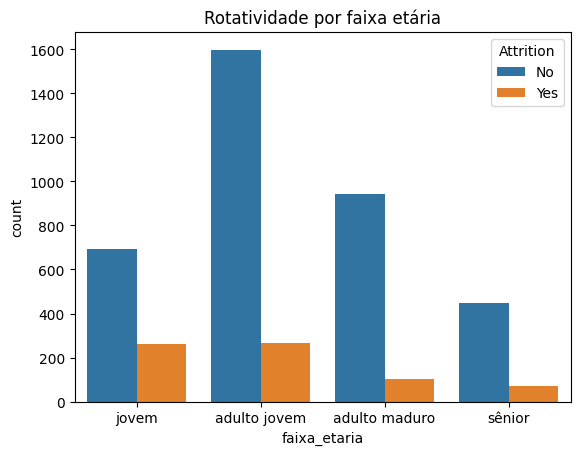

In [ ]:
order = ['jovem', 'adulto jovem', 'adulto maduro', 'sênior']
sns.countplot(x='faixa_etaria', hue='Attrition', data=tabela, order=order)
plt.title('Rotatividade por faixa etária')
plt.show()

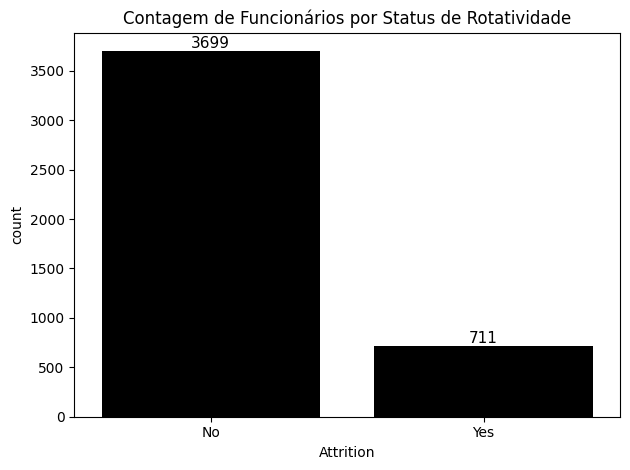

In [ ]:
# Plotagem
ax = sns.countplot(x='Attrition', data=tabela, color='black')
plt.title('Contagem de Funcionários por Status de Rotatividade')

# Adiciona os valores nas barras com cor preta
for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{int(altura)}',
                (p.get_x() + p.get_width() / 2, altura),
                ha='center', va='bottom',
                fontsize=11, color='black')

plt.tight_layout()
plt.show()


In [ ]:
print("Média:")
print(tabela[['MonthlyIncome', 'Age']].mean())
print("\nMediana:")
print(tabela[['MonthlyIncome', 'Age']].median())


Média:
MonthlyIncome    65029.312925
Age                 36.923810
dtype: float64

Mediana:
MonthlyIncome    49190.0
Age                 36.0
dtype: float64


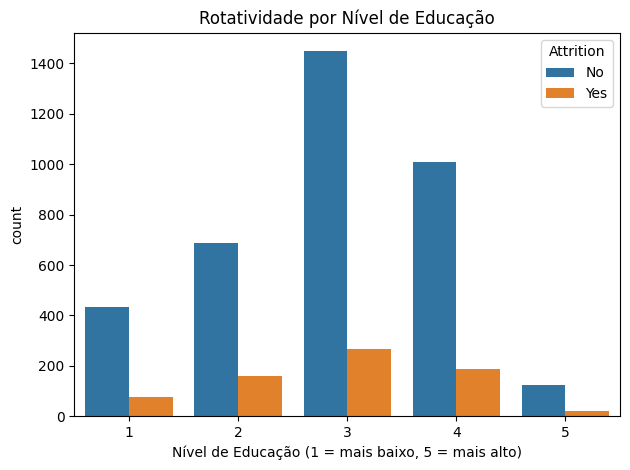

In [ ]:
sns.countplot(x='Education', hue='Attrition', data=tabela)
plt.title('Rotatividade por Nível de Educação')
plt.xlabel('Nível de Educação (1 = mais baixo, 5 = mais alto)')
plt.tight_layout()
plt.show()

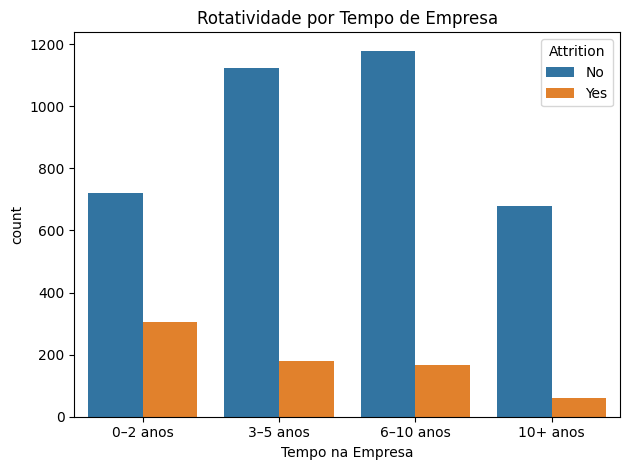

In [ ]:
# Criar faixas de tempo de empresa
tabela['TempoEmpresa_cat'] = pd.cut(tabela['YearsAtCompany'], bins=[-1, 2, 5, 10, 40],
                                     labels=['0–2 anos', '3–5 anos', '6–10 anos', '10+ anos'])

sns.countplot(x='TempoEmpresa_cat', hue='Attrition', data=tabela)
plt.title('Rotatividade por Tempo de Empresa')
plt.xlabel('Tempo na Empresa')
plt.tight_layout()
plt.show()

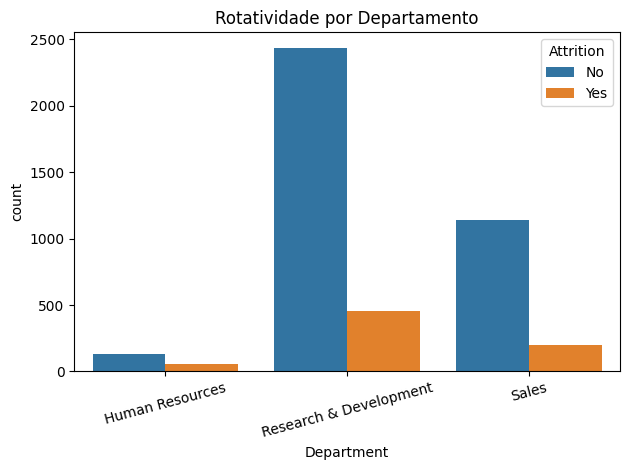

In [ ]:
sns.countplot(x='Department', hue='Attrition', data=tabela)
plt.title('Rotatividade por Departamento')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

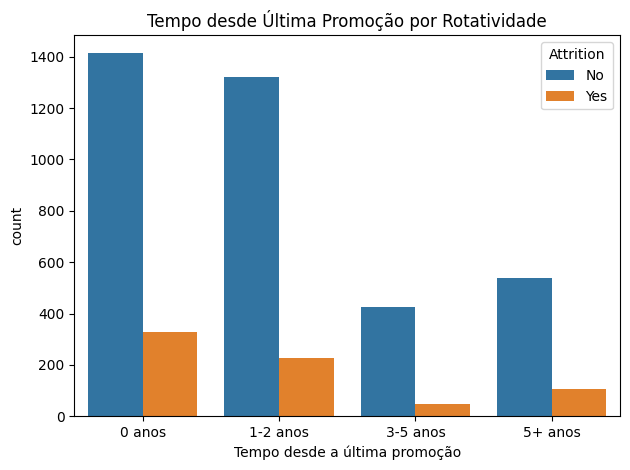

In [ ]:
# Categorizar tempo desde promoção
tabela['Promocao_cat'] = pd.cut(tabela['YearsSinceLastPromotion'], bins=[-1, 0, 2, 5, 40],
                                 labels=['0 anos', '1-2 anos', '3-5 anos', '5+ anos'])

sns.countplot(x='Promocao_cat', hue='Attrition', data=tabela)
plt.title('Tempo desde Última Promoção por Rotatividade')
plt.xlabel('Tempo desde a última promoção')
plt.tight_layout()
plt.show()

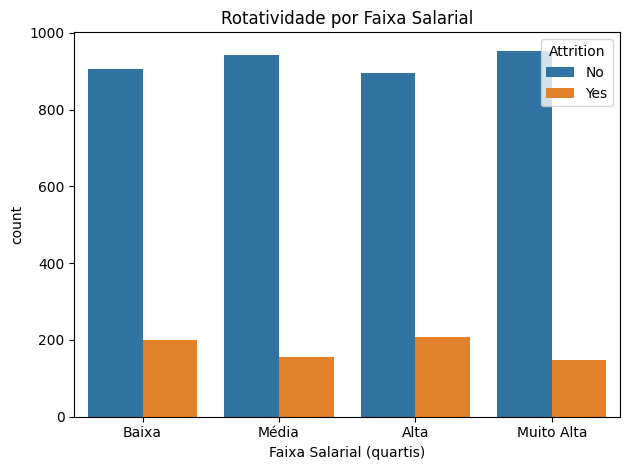

In [ ]:
# Criar faixas salariais
tabela['Faixa_Salarial'] = pd.qcut(tabela['MonthlyIncome'], q=4, labels=['Baixa', 'Média', 'Alta', 'Muito Alta'])

sns.countplot(x='Faixa_Salarial', hue='Attrition', data=tabela)
plt.title('Rotatividade por Faixa Salarial')
plt.xlabel('Faixa Salarial (quartis)')
plt.tight_layout()
plt.show()

A maior parte dos funcionários é divorciada, seguida por casados e solteiros. Apesar de serem minoria, os solteiros apresentam proporcionalmente mais saídas da empresa.

A faixa etária predominante está entre 30 e 40 anos, com destaque para adultos jovens e maduros. No entanto, os maiores índices de rotatividade ocorrem entre os mais jovens, indicando que profissionais no início da carreira tendem a sair com mais frequência.

O nível médio de escolaridade é o mais comum e também concentra o maior número de desligamentos. Isso pode estar relacionado tanto à sua representatividade quanto a uma menor retenção nesse grupo.

Funcionários com menos tempo de empresa demonstram maior tendência à saída, o que sugere que estabilidade e adaptação influenciam na decisão de permanência.

O setor de Pesquisa e Desenvolvimento possui o maior volume de funcionários e, por consequência, mais desligamentos absolutos. Contudo, quando analisamos proporcionalmente, o departamento de Vendas apresenta a maior taxa de rotatividade.

Em relação ao salário, a distribuição entre quem fica e quem sai é semelhante. A princípio, não há uma relação direta entre salário e saída, o que será melhor avaliado nos modelos preditivos.

#Modelos

Com os dados preparados e explorados, partimos agora para a construção de modelos preditivos com o objetivo de identificar funcionários com maior probabilidade de pedir desligamento da empresa.

A modelagem é uma etapa central em projetos de ciência de dados, pois permite transformar padrões e relações descobertos nos dados em previsões quantitativas e acionáveis. Para isso, utilizamos algoritmos supervisionados de classificação binária, treinados com base na variável alvo Attrition.

Além de focar na performance dos modelos, também nos preocupamos com a interpretação dos resultados e a correta avaliação das métricas, especialmente devido ao desbalanceamento das classes (número significativamente maior de funcionários que permanecem em relação aos que saem).

Nesta etapa, testamos diferentes algoritmos com abordagens complementares, aplicando técnicas de balanceamento e validação para garantir resultados confiáveis e comparáveis.

##Treino e Teste

In [ ]:
# Separar variável resposta e preditoras
X = tabela_dummies.drop(columns=['Attrition', 'EmployeeID', 'EmployeeCount', 'StandardHours', 'Over18', 'Gender', 'JobRole', 'faixa_etaria','TempoEmpresa_cat', 'Promocao_cat', 'Faixa_Salarial'])
y = tabela_dummies['Attrition']

# Dividir dados com estratificação
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

##Random Forest

=== Random Forest ===
Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.99      1.00      1.00       740
         Yes       1.00      0.97      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

Matriz de Confusão:
[[740   0]
 [  4 138]]
AUC: 0.9976732013703845
Recall (classe positiva): 0.971830985915493
F1-score (classe positiva): 0.9857142857142858


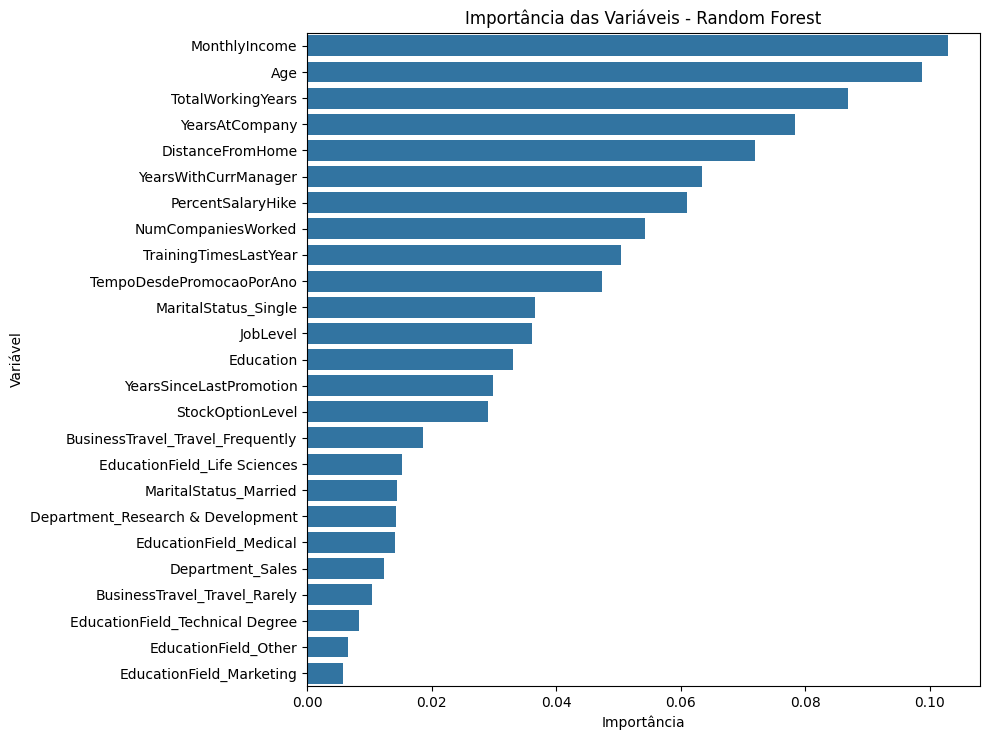

In [ ]:
# 1. Modelo balanceado
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# 2. Previsões
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# 3. Converter para binário
y_test_bin = y_test.map({'No': 0, 'Yes': 1})
y_pred_rf_bin = pd.Series(y_pred_rf).map({'No': 0, 'Yes': 1})

# 4. Avaliação textual
print("=== Random Forest ===")
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rf))

# 5. Métricas adicionais
print("AUC:", roc_auc_score(y_test_bin, y_prob_rf))
print("Recall (classe positiva):", recall_score(y_test_bin, y_pred_rf_bin))
print("F1-score (classe positiva):", f1_score(y_test_bin, y_pred_rf_bin))

# 6. Importância das variáveis
importancias = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': rf_model.feature_importances_
}).sort_values(by='Importância', ascending=False)

# 7. Gráfico de barras
plt.figure(figsize=(10, len(importancias) * 0.3))
sns.barplot(x='Importância', y='Variável', data=importancias)
plt.title('Importância das Variáveis - Random Forest')
plt.tight_layout()
plt.show()



No modelo de Random Forest, as variáveis com maior importância foram:

MonthlyIncome

Age

TotalWorkingYears

YearsAtCompany

Essas variáveis aparecem com mais frequência em divisões de alto ganho de impureza (critério Gini). Isso indica que características relacionadas à experiência e remuneração foram mais determinantes nas árvores do Random Forest.

##Regressão Logística

Relatório de Classificação (sklearn):
              precision    recall  f1-score   support

          No       0.91      0.67      0.77       740
         Yes       0.28      0.66      0.39       142

    accuracy                           0.67       882
   macro avg       0.60      0.67      0.58       882
weighted avg       0.81      0.67      0.71       882

Matriz de Confusão:
[[497 243]
 [ 48  94]]


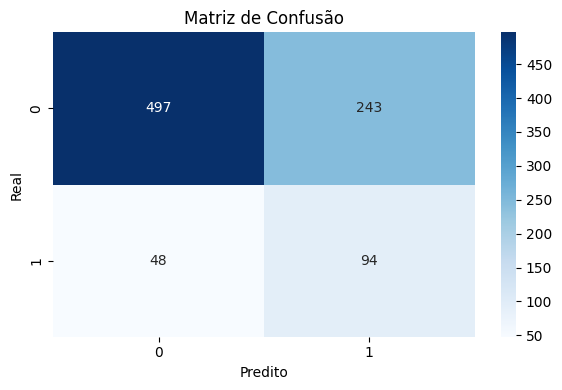

Coeficientes e Odds Ratios (Interpretação Estatística):
                             Variável  Coef_Logit  Odds_Ratio
11            YearsSinceLastPromotion    0.584914       1.795
16   BusinessTravel_Travel_Frequently    0.549877       1.733
15               MaritalStatus_Single    0.518594       1.680
5                  NumCompaniesWorked    0.333782       1.396
17       BusinessTravel_Travel_Rarely    0.330764       1.392
14              MaritalStatus_Married    0.134246       1.144
6                   PercentSalaryHike    0.037730       1.038
1                    DistanceFromHome    0.032284       1.033
2                           Education   -0.001557       0.998
4                       MonthlyIncome   -0.022585       0.978
7                    StockOptionLevel   -0.061500       0.940
10                     YearsAtCompany   -0.088712       0.915
3                            JobLevel   -0.091575       0.912
13           TempoDesdePromocaoPorAno   -0.159555       0.853
18  Department

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Criar e treinar o modelo com dados balanceados
modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train_scaled, y_train)

# 3. Fazer previsões
y_pred = modelo.predict(X_test_scaled)

# 4. Avaliar com métricas clássicas
print("Relatório de Classificação (sklearn):")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
matriz = confusion_matrix(y_test, y_pred)
print(matriz)

# 5. Gráfico da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()

# 6. Interpretar coeficientes com base estatística
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coef_Logit': modelo.coef_[0],
    'Odds_Ratio': np.exp(modelo.coef_[0]).round(3)
})
coeficientes = coeficientes.sort_values(by='Odds_Ratio', ascending=False)

print("Coeficientes e Odds Ratios (Interpretação Estatística):")
print(coeficientes)

A Regressão Logística permite interpretar diretamente a influência de cada variável sobre a chance de rotatividade. As variáveis com coeficientes positivos aumentam a chance de saída, enquanto coeficientes negativos reduzem.

As variáveis mais associadas à saída foram:

Tempo desde a última promoção

Estado civil solteiro

Viagens frequentes a trabalho

Mais empresas anteriores

Essas relações são consistentes com o esperado: falta de promoção, maior histórico de troca de empregos e vida pessoal mais flexível tendem a elevar a rotatividade.

### Curva ROC

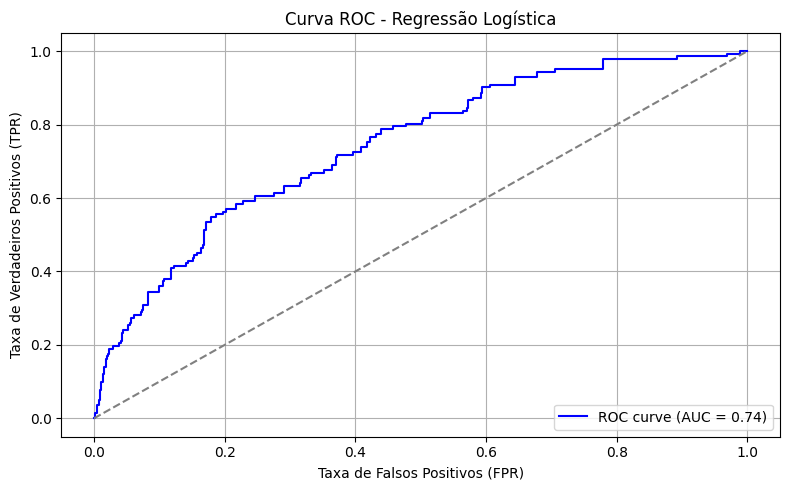

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obter probabilidades do modelo
y_probs = modelo.predict_proba(X_test_scaled)[:, 1]  # probabilidade da classe positiva ("Yes")

# Converter y_test para valores binários
y_test_bin = y_test.map({'No': 0, 'Yes': 1})

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_probs)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



##XGBoost

In [ ]:
# Converter y para binário
y_train_bin = y_train.map({'No': 0, 'Yes': 1})
y_test_bin = y_test.map({'No': 0, 'Yes': 1})

# Calcular proporção para balancear
scale_pos = (y_train_bin == 0).sum() / (y_train_bin == 1).sum()

# Criar e treinar o modelo XGBoost com balanceamento
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos,
    random_state=42
)
xgb_model.fit(X_train, y_train_bin)

# Prever
y_pred_xgb = xgb_model.predict(X_test)

# Avaliação
print("Relatório de Classificação (XGBoost):")
print(classification_report(y_test_bin, y_pred_xgb))

print("Matriz de Confusão (XGBoost):")
print(confusion_matrix(y_test_bin, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:19:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Relatório de Classificação (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      0.98      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

Matriz de Confusão (XGBoost):
[[740   0]
 [  3 139]]


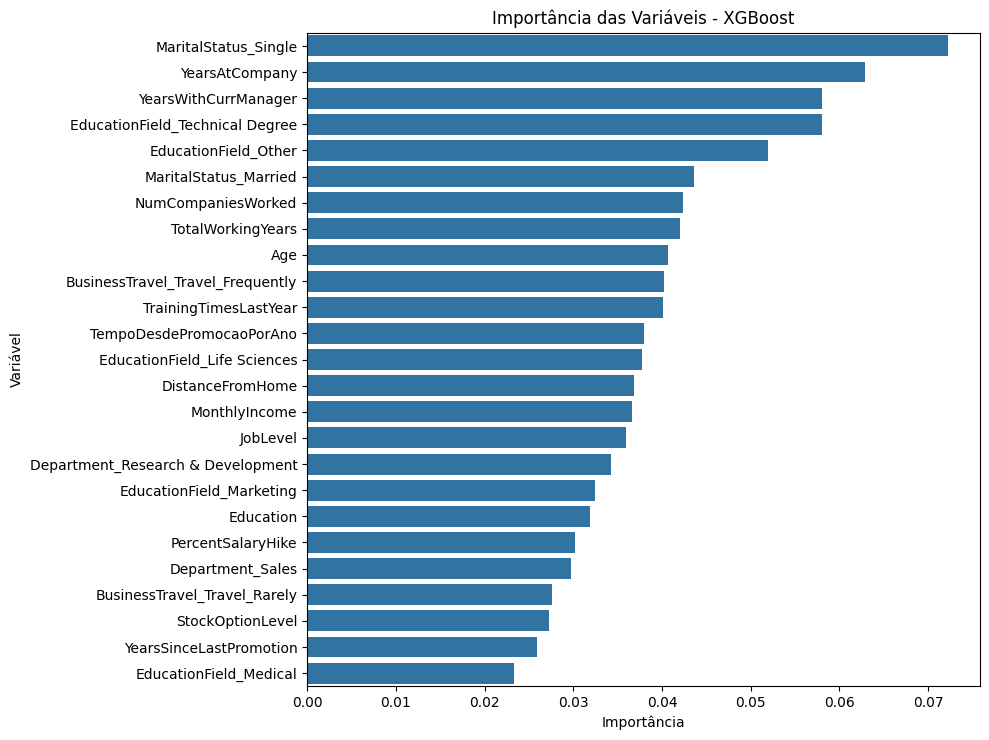

In [ ]:
# Importância das variáveis
importancia_xgb = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': xgb_model.feature_importances_
}).sort_values(by='Importância', ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, len(importancia_xgb) * 0.3))
sns.barplot(x='Importância', y='Variável', data=importancia_xgb)
plt.title('Importância das Variáveis - XGBoost')
plt.tight_layout()
plt.show()


O XGBoost apresentou um comportamento distinto, destacando:

MaritalStatus_Single

YearsAtCompany

YearsWithCurrManager

EducationField_Technical Degree

Por usar um método de boosting sequencial, o XGBoost tende a favorecer variáveis que ajudam a corrigir erros residuais ao longo do treinamento. Isso pode explicar o destaque de variáveis que capturam aspectos organizacionais e relacionais, como tempo com o gerente e estado civil.



# Avaliação

In [ ]:
# Regressão Logística
y_pred_log = modelo.predict(X_test_scaled)
y_pred_log_bin = pd.Series(y_pred_log).map({'No': 0, 'Yes': 1})
auc_log = roc_auc_score(y_test_bin, modelo.predict_proba(X_test_scaled)[:, 1])
recall_log = recall_score(y_test_bin, y_pred_log_bin)
f1_log = f1_score(y_test_bin, y_pred_log_bin)
acc_log = accuracy_score(y_test_bin, y_pred_log_bin)

# Random Forest
auc_rf = roc_auc_score(y_test_bin, rf_model.predict_proba(X_test)[:, 1])
recall_rf = recall_score(y_test_bin, y_pred_rf_bin)
f1_rf = f1_score(y_test_bin, y_pred_rf_bin)
acc_rf = accuracy_score(y_test_bin, y_pred_rf_bin)

# XGBoost
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
auc_xgb = roc_auc_score(y_test_bin, y_prob_xgb)
recall_xgb = recall_score(y_test_bin, y_pred_xgb)
f1_xgb = f1_score(y_test_bin, y_pred_xgb)
acc_xgb = accuracy_score(y_test_bin, y_pred_xgb)

# Comparação de modelos
comparacao = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest', 'XGBoost'],
    'AUC': [auc_log, auc_rf, auc_xgb],
    'Recall (Yes)': [recall_log, recall_rf, recall_xgb],
    'F1-score (Yes)': [f1_log, f1_rf, f1_xgb],
    'Accuracy': [acc_log, acc_rf, acc_xgb]
})
print(comparacao)

                Modelo       AUC  Recall (Yes)  F1-score (Yes)  Accuracy
0  Regressão Logística  0.742891      0.661972        0.392484  0.670068
1        Random Forest  0.997673      0.971831        0.985714  0.995465
2              XGBoost  0.999857      0.978873        0.989324  0.996599


#Links

Video no loom: https://www.loom.com/share/81a3c7305b2e403ca918f7cdef8edffc?sid=ddb0f9b6-1d0a-49fe-a348-c09ffba5949c
GitHub: https://github.com/brunaderner/rh-machine-learning
Apresentação: https://docs.google.com/presentation/d/1KqSNK9wOfJ_D1JkavuPRd1P-FvHV9sY6BeSDnzZQGx4/edit?usp=sharing